In [1]:
import torch
from torch import nn
from d2l import torch as d2l


def vgg_block(num_convs, in_channels, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.Conv2d(in_channels, out_channels,
                                kernel_size=3, padding=1))
        layers.append(nn.ReLU())
        in_channels = out_channels
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

In [3]:
in_channels =1
out_channels = 5
net = vgg_block(3,in_channels=in_channels, out_channels=out_channels)

In [48]:
X = torch.randn(size=(1, 1, 224, 224))

def print_net(net):
    global X
    for blk in net:
        if blk.__class__.__name__ == "Sequential111":
            print_net(blk)
            print()
        else:
            X = blk(X)
            print(blk.__class__.__name__,'output shape:\t',X.shape)

print_net(net)

Sequential output shape:	 torch.Size([1, 16, 112, 112])
Sequential output shape:	 torch.Size([1, 32, 56, 56])
Sequential output shape:	 torch.Size([1, 64, 28, 28])
Sequential output shape:	 torch.Size([1, 128, 14, 14])
Sequential output shape:	 torch.Size([1, 128, 7, 7])
Flatten output shape:	 torch.Size([1, 6272])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


In [49]:
def vgg(conv_arch):
    conv_blks = []
    in_channels = 1
    # 卷积层部分
    for (num_convs, out_channels) in conv_arch:
        conv_blks.append(vgg_block(num_convs, in_channels, out_channels))
        in_channels = out_channels

    return nn.Sequential(
        *conv_blks, nn.Flatten(),
        # 全连接层部分
        nn.Linear(out_channels * 7 * 7, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 10))

conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))
net = vgg(conv_arch)

In [50]:
ratio = 4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]
net = vgg(small_conv_arch)

loss 0.176, train acc 0.935, test acc 0.919
1416.4 examples/sec on cuda:0


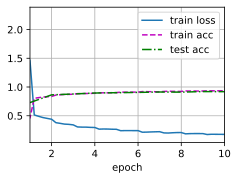

In [51]:
lr, num_epochs, batch_size = 0.05, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

In [58]:
train_data = next(iter(train_iter))

In [110]:
import numpy as np
from sonic.utils_func import show_img
_img = train_data[0][0]


def print_net(net,img):
    for blk in net:
        img = blk(img)
        show_tensor_img(img)
        print(blk.__class__.__name__,'output shape:\t',X.shape)

def show_tensor_img(img):
    img = img.detach().numpy().squeeze()
    img *= 255
    img = img.astype(np.uint8)
    show_img(img)

print_net(net,_img)

Sequential output shape:	 torch.Size([1, 10])
Sequential output shape:	 torch.Size([1, 10])
Sequential output shape:	 torch.Size([1, 10])
Sequential output shape:	 torch.Size([1, 10])
Sequential output shape:	 torch.Size([1, 10])
Flatten output shape:	 torch.Size([1, 10])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (128x49 and 6272x4096)